# Assignment 5
# Using semantics (lexical semantics and word embedding)

### Importing required libraries

In [66]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import nltk
import tensorflow
import keras
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plot
import itertools
from sklearn.metrics import roc_auc_score, roc_curve
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.metrics import classification_report
from textblob import TextBlob
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from keras.optimizers import SGD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from keras import regularizers
from keras.layers import Dropout

### Load csv file
### Seperate into x_values and y_values
### Pick up dataset with rating - 1 or 5
### In order to balance data, pick 749 reviews with 1 star and 1000 reviews with 5 star

In [67]:
df = pd.read_csv("dataset.csv")
x_column = df["text"]
y_column = df["stars"]
x_value = []
y_value = []
count_1s = 0
count_5s = 0
for i in range(0,10000):
    if y_column[i] == 1:
        if count_1s < 750:
            count_1s = count_1s + 1
            y_value.append(0)   
            #n_sent = f_tokenize(x_column[i])
            x_value.append(x_column[i])
    if y_column[i] == 5:
        if count_5s < 750:
            count_5s = count_5s + 1
            y_value.append(1) 
            #n_sent = f_tokenize(x_column[i])
            x_value.append(x_column[i])
                  
print(x_value)
print(y_value)
print(count_1s)
print(count_5s)


['My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!', 'I have no idea why some people give bad reviews about this place. It goes to show you, you can 

### Spilt the data into train set and test set with 0.25 as split ratio

In [68]:
x_value = np.array(x_value)
y_value = np.array(y_value)
x_train,x_test, y_train, y_test = train_test_split(x_value,y_value,test_size=0.25, random_state=0)
print(x_test.shape, y_test.shape)
print(x_train.shape, y_train.shape)

(375,) (375,)
(1124,) (1124,)


### Tf-Idf Vectorization of x_train and x_test

In [69]:
vectorizer = TfidfVectorizer(lowercase=True,max_df=0.95, min_df=0.01, max_features=6392)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)
print(x_train_tfidf.shape)
print(y_train.shape)
print(x_test_tfidf.shape)

(1124, 1142)
(1124,)
(375, 1142)


### Using linear model - SVM without k-fold
### This indicates how improper split does not result in good splits

In [70]:
classifier = svm.SVC(kernel='linear', C=0.1)
y_pred = classifier.fit(x_train_tfidf, y_train).predict(x_test_tfidf)
print(y_pred)

[0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1
 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1
 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0
 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0
 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1
 0 0 1 0 1]


### Using linear model - SVM with 10-fold

In [71]:
scores = cross_val_score(classifier,x_train_tfidf,y_train, cv=10)
scores 

array([0.79646018, 0.86725664, 0.83185841, 0.81415929, 0.8125    ,
       0.86607143, 0.89285714, 0.875     , 0.89285714, 0.84821429])

### Computing metrics for svm with no cross validation

In [72]:
mean_accuracy = np.mean(scores)
print("Mean:")
print(mean_accuracy)
std_accuracy = np.std(scores)
print("Std_Deviation")
print(std_accuracy)

Mean:
0.8497234513274335
Std_Deviation
0.032777144633375846


### Computing metrics for svm with no cross validation

Confusion Matrix
[[164  25]
 [ 34 152]]
Classification Report : 
             precision    recall  f1-score   support

          0       0.83      0.87      0.85       189
          1       0.86      0.82      0.84       186

avg / total       0.84      0.84      0.84       375

0.8424645844000683


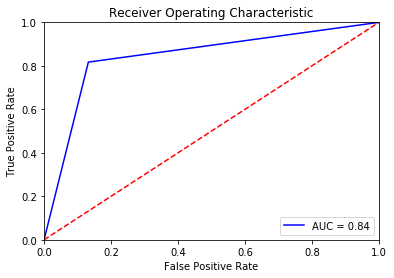

In [73]:
print("Confusion Matrix")
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
#Printing the classification report.
print ("Classification Report : ")
print (classification_report(y_test,y_pred) )
fpr, tpr, threshold = roc_curve(y_test,y_pred)
#Printing the area under the ROC curve.
roc_auc=roc_auc_score(y_test,y_pred)
#Displaying the ROC curve
print (roc_auc)
plot.title('Receiver Operating Characteristic')
plot.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plot.legend(loc = 'lower right')
plot.plot([0, 1], [0, 1],'r--')
plot.xlim([0, 1])
plot.ylim([0, 1])
plot.ylabel('True Positive Rate')
plot.xlabel('False Positive Rate')
plot.show()

### Using Non-leanier ANN

In [74]:
# create model
model = Sequential()
model.add(Dense(100, input_dim=1142, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
sgd = SGD(lr=0.1, momentum=0.5, decay=0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 20
epochs = 7
history = model.fit(x_train_tfidf, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.1)
print('Evaluating the test data on the model')
score = model.evaluate(x_test_tfidf, y_test,batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

Train on 1011 samples, validate on 113 samples
Epoch 1/7
1011/1011 [==============================] - 3s 3ms/step - loss: 0.6912 - acc: 0.5539 - val_loss: 0.6840 - val_acc: 0.7876
Epoch 2/7
1011/1011 [==============================] - 2s 2ms/step - loss: 0.6392 - acc: 0.7923 - val_loss: 0.5430 - val_acc: 0.9115
Epoch 3/7
1011/1011 [==============================] - 1s 1ms/step - loss: 0.3767 - acc: 0.8932 - val_loss: 0.2524 - val_acc: 0.8938
Epoch 4/7
1011/1011 [==============================] - 1s 1ms/step - loss: 0.1583 - acc: 0.9545 - val_loss: 0.2165 - val_acc: 0.9027
Epoch 5/7
1011/1011 [==============================] - 2s 2ms/step - loss: 0.0958 - acc: 0.9703 - val_loss: 0.1762 - val_acc: 0.9381
Epoch 6/7
1011/1011 [==============================] - 1s 1ms/step - loss: 0.0451 - acc: 0.9931 - val_loss: 0.2130 - val_acc: 0.9027
Epoch 7/7
1011/1011 [==============================] - 2s 2ms/step - loss: 0.0343 - acc: 0.9951 - val_loss: 0.2036 - val_acc: 0.9115
Evaluating the test da

### Truncated SVD

In [75]:
svd = TruncatedSVD(n_components=1112, n_iter=7, random_state=42,tol=0.1)
x_train_tsvd = svd.fit(x_train_tfidf)
x_test_tsvd = svd.fit(x_test_tfidf)
print(x_test_tsvd)

TruncatedSVD(algorithm='randomized', n_components=1112, n_iter=7,
       random_state=42, tol=0.1)


### Using linear model - SVM without k-fold
### This indicates how improper split does not result in good splits

In [76]:
classifier = svm.SVC(kernel='linear', C=0.1)
y_pred = classifier.fit(x_train_tfidf, y_train).predict(x_test_tfidf)
print(y_pred)

[0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1
 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1
 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0
 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0
 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1
 0 0 1 0 1]


### Computing metrics for svm with no cross validation


Confusion Matrix
[[164  25]
 [ 34 152]]
Classification Report : 
             precision    recall  f1-score   support

          0       0.83      0.87      0.85       189
          1       0.86      0.82      0.84       186

avg / total       0.84      0.84      0.84       375

0.8424645844000683


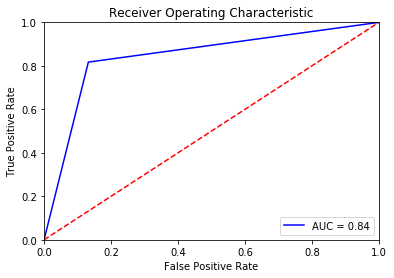

In [77]:
print("Confusion Matrix")
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
#Printing the classification report.
print ("Classification Report : ")
print (classification_report(y_test,y_pred) )
fpr, tpr, threshold = roc_curve(y_test,y_pred)
#Printing the area under the ROC curve.
roc_auc=roc_auc_score(y_test,y_pred)
#Displaying the ROC curve
print (roc_auc)
plot.title('Receiver Operating Characteristic')
plot.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plot.legend(loc = 'lower right')
plot.plot([0, 1], [0, 1],'r--')
plot.xlim([0, 1])
plot.ylim([0, 1])
plot.ylabel('True Positive Rate')
plot.xlabel('False Positive Rate')
plot.show()

### Using linear model - SVM with 10-fold

In [78]:
scores = cross_val_score(classifier,x_train_tfidf,y_train, cv=5)
scores 

array([0.83555556, 0.82666667, 0.83555556, 0.88      , 0.86160714])

### Computing metrics for svm with cross validation

In [79]:
mean_accuracy = np.mean(scores)
print("Mean:")
print(mean_accuracy)
std_accuracy = np.std(scores)
print("Std_Deviation")
print(std_accuracy)

Mean:
0.8478769841269841
Std_Deviation
0.019869162933462813


### Using Non-leanier ANN

In [80]:
# create model
model = Sequential()
model.add(Dense(100, input_dim=1142, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
sgd = SGD(lr=0.1, momentum=0.5, decay=0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 20
epochs = 7
history = model.fit(x_train_tfidf, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.1)
print('Evaluating the test data on the model')
score = model.evaluate(x_test_tfidf, y_test,batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

Train on 1011 samples, validate on 113 samples
Epoch 1/7
1011/1011 [==============================] - 3s 3ms/step - loss: 0.6911 - acc: 0.5331 - val_loss: 0.6858 - val_acc: 0.5841
Epoch 2/7
1011/1011 [==============================] - 2s 2ms/step - loss: 0.6367 - acc: 0.7695 - val_loss: 0.5452 - val_acc: 0.8850
Epoch 3/7
1011/1011 [==============================] - 1s 1ms/step - loss: 0.3715 - acc: 0.9041 - val_loss: 0.2528 - val_acc: 0.9115
Epoch 4/7
1011/1011 [==============================] - 2s 2ms/step - loss: 0.1663 - acc: 0.9515 - val_loss: 0.2159 - val_acc: 0.9027
Epoch 5/7
1011/1011 [==============================] - 2s 2ms/step - loss: 0.0901 - acc: 0.9802 - val_loss: 0.1853 - val_acc: 0.9204
Epoch 6/7
1011/1011 [==============================] - 1s 1ms/step - loss: 0.0502 - acc: 0.9970 - val_loss: 0.1754 - val_acc: 0.9115
Epoch 7/7
1011/1011 [==============================] - 1s 1ms/step - loss: 0.0345 - acc: 0.9970 - val_loss: 0.1792 - val_acc: 0.9115
Evaluating the test da

### Using TextBlob API

In [81]:
list_sentences = []
for i in range(0,500):
    document = x_train[i].strip()
    sentences = nltk.sent_tokenize(document)
    sentences = [sentence.strip() for sentence in sentences]
    list_sentences.append(sentences)
print(list_sentences)

[["I was extremely happy that we chose Cool Cuts 4 Kids for my son's first big boy hair cut.", 'He was instantly comfortable and drawn in by all of the friendly things they have for children.', 'He was given the choice of a movie or playing a video game, of course knowing exactly what he wants went straight for the video game (Sonic on XBOX).', "It was pretty much a breeze from that point the little guy was hypnotized and didn't even realize what was going on w/ his beautiful, lovely long hair =( obviously they need to focus on distracting the mom's lol!", "Jessie who cut my sons long hair was a doll, she didn't seem to be bothered by the mother breathing down her neck as she hacked off my little's hair or the boyfriend taking a copious amount of pictures and video of the whole event.", "In the end my son looked great and I was a happy mama, I couldn't have asked for a better experience."], ['Absolutely loved this place!', 'My fiance and I came across the Arrogant Butcher while we were

In [82]:
final_tokens = []
for doc in list_sentences:
    tokenized = []
    for sent in doc:
        tokenized.append(nltk.word_tokenize(sent))
    final_tokens.append(tokenized)
print(final_tokens)
    
    

[[['I', 'was', 'extremely', 'happy', 'that', 'we', 'chose', 'Cool', 'Cuts', '4', 'Kids', 'for', 'my', 'son', "'s", 'first', 'big', 'boy', 'hair', 'cut', '.'], ['He', 'was', 'instantly', 'comfortable', 'and', 'drawn', 'in', 'by', 'all', 'of', 'the', 'friendly', 'things', 'they', 'have', 'for', 'children', '.'], ['He', 'was', 'given', 'the', 'choice', 'of', 'a', 'movie', 'or', 'playing', 'a', 'video', 'game', ',', 'of', 'course', 'knowing', 'exactly', 'what', 'he', 'wants', 'went', 'straight', 'for', 'the', 'video', 'game', '(', 'Sonic', 'on', 'XBOX', ')', '.'], ['It', 'was', 'pretty', 'much', 'a', 'breeze', 'from', 'that', 'point', 'the', 'little', 'guy', 'was', 'hypnotized', 'and', 'did', "n't", 'even', 'realize', 'what', 'was', 'going', 'on', 'w/', 'his', 'beautiful', ',', 'lovely', 'long', 'hair', '=', '(', 'obviously', 'they', 'need', 'to', 'focus', 'on', 'distracting', 'the', 'mom', "'s", 'lol', '!'], ['Jessie', 'who', 'cut', 'my', 'sons', 'long', 'hair', 'was', 'a', 'doll', ',', '

In [83]:
pos_neg_list= []
for doc in final_tokens:
    count = 0
    subjective_count=0
    positive_count=0
    negative_count=0
    subjective_sentences=[]
    positive_sentence=[]
    negative_sentence=[]
    for sentences in doc:
        #print(sentences)
        blob = TextBlob(str(sentences))
        sentiment = blob.sentiment
        count +=1
        if (sentiment.polarity>0 and sentiment.subjectivity >0 ):
            positive_sentence.append(sentences)
            positive_count +=1
        if (sentiment.polarity<0 and sentiment.subjectivity >0 ):
            negative_sentence.append(sentences)
            negative_count +=1
    pos_neg_list.append(positive_count-negative_count)
print(len(pos_neg_list))
    
        
    

500


In [84]:
def tokenize(txt):
    #Tokenizing the text into sentences.
    sent=sent_tokenize(txt)
    #Tokenizing into words
    from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    text1=tokenizer.tokenize(txt)
    #print(len(words))
    #Removing stopwords
    text1=[str.lower(word) for word in text1]
    filtered_words = [word for word in text1 if word not in stopwords.words('english') and not word.isdigit()]
    return filtered_words


In [85]:
df3=pd.DataFrame()
df3['text'] = x_train
df3['output']= y_train
list1=[]
#list stores the tokens of each review
for i in df3['text']:
    list1.append(tokenize(i))
print(len(df3))

1124


In [86]:
df3['tokens']=list1
print(df3[1:10])

                                                text  output  \
1  Absolutely loved this place! My fiance and I c...       1   
2  OK, being from Wisconsin (the land of the "gre...       1   
3  One stop has one goal and that is to get the $...       0   
4  This is a great QT for when you're driving thr...       1   
5  A great place for midday healthy food, thin cr...       1   
6  Excellent service and food.  Best tex-mex in t...       1   
7  They have a limited time thing going on right ...       1   
8  We decided to hit up the "Wine Down Wednesday"...       0   
9  After stepping off the plane hungry, I looked ...       0   

                                              tokens  
1  [absolutely, loved, place, fiance, came, acros...  
2  [ok, wisconsin, land, great, lakes, completely...  
3  [one, stop, one, goal, get, diagnosis, fee, sp...  
4  [great, qt, driving, phoenix, right, freeway, ...  
5  [great, place, midday, healthy, food, thin, cr...  
6  [excellent, service, food,

In [87]:
for i in df3['tokens']:
    i=[word for word in i if len(word) > 1]
#Viewing the dataset again.
print(df3[1:10])


                                                text  output  \
1  Absolutely loved this place! My fiance and I c...       1   
2  OK, being from Wisconsin (the land of the "gre...       1   
3  One stop has one goal and that is to get the $...       0   
4  This is a great QT for when you're driving thr...       1   
5  A great place for midday healthy food, thin cr...       1   
6  Excellent service and food.  Best tex-mex in t...       1   
7  They have a limited time thing going on right ...       1   
8  We decided to hit up the "Wine Down Wednesday"...       0   
9  After stepping off the plane hungry, I looked ...       0   

                                              tokens  
1  [absolutely, loved, place, fiance, came, acros...  
2  [ok, wisconsin, land, great, lakes, completely...  
3  [one, stop, one, goal, get, diagnosis, fee, sp...  
4  [great, qt, driving, phoenix, right, freeway, ...  
5  [great, place, midday, healthy, food, thin, cr...  
6  [excellent, service, food,

In [88]:
#Getting the frequency of the datasat.
freq_dist=nltk.FreqDist(df3['tokens'][0])
print(freq_dist)

<FreqDist with 75 samples and 86 outcomes>


In [89]:
#Loading the NRC-emotion-lexicon
nrc_lex = pd.read_csv( "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt",sep='\t', names=['word','emotion','association'])
#nrc_lex.head()
print ("\n NRC Emotion lexicon loaded...")


 NRC Emotion lexicon loaded...


In [25]:
col=['anger','fear','anticipation','trust','surprise','joy','sadness','disgust']
emotions=pd.DataFrame(columns=col)
print(df3['tokens'])

0       [extremely, happy, chose, cool, cuts, kids, so...
1       [absolutely, loved, place, fiance, came, acros...
2       [ok, wisconsin, land, great, lakes, completely...
3       [one, stop, one, goal, get, diagnosis, fee, sp...
4       [great, qt, driving, phoenix, right, freeway, ...
5       [great, place, midday, healthy, food, thin, cr...
6       [excellent, service, food, best, tex, mex, val...
7       [limited, time, thing, going, right, bbq, chic...
8       [decided, hit, wine, wednesday, happenin, tast...
9       [stepping, plane, hungry, looked, around, term...
10      [love, awesome, pulled, pork, brisket, turkey,...
11      [walked, late, lunch, hour, get, acknowledged,...
12      [went, physical, location, first, time, dog, f...
13      [went, acrylics, friday, horrible, getting, ac...
14      [big, fan, place, either, stop, slow, sunday, ...
15      [ever, get, hooked, crack, would, want, crack,...
16      [place, heavenly, dreams, regular, basis, cook...
17      [psych

In [26]:
#For each review, using the frequency distribution of it's tokens, store the list of the 8 emotion attribute values
#in list and the list of emotion words of that review in emotion_words
list=[]
feature =[]
emotion_words=[]
for i in df3['tokens'][0:500]:
    anger = 0
    fear = 0
    anticipation = 0
    trust = 0
    surprise = 0
    sadness = 0
    joy = 0
    disgust = 0
    list1=[]
    freq_dist=nltk.FreqDist(i)
    for w1,w2 in freq_dist.items():
        if nrc_lex['word'].str.contains(w1).any():
            #print ("Found",w1)
            #Change here ..every line is getting printed
            #print (nrc_lex.loc[nrc_lex['word'] == w1])
            anger_list = nrc_lex[nrc_lex['word']==w1][nrc_lex['emotion']=='anger'].index.tolist()
            if len(anger_list) == 1:
                anger += w2*int(nrc_lex.iloc[int(anger_list[0])]['association'])
            fear_list = nrc_lex[nrc_lex['word']==w1][nrc_lex['emotion']=='fear'].index.tolist()
            if len(fear_list) == 1:
                fear += w2*int(nrc_lex.iloc[int(fear_list[0])]['association'])
            anticipation_list = nrc_lex[nrc_lex['word']==w1][nrc_lex['emotion']=='anticipation'].index.tolist()
            if len(anticipation_list) == 1:
                anticipation += w2*int(nrc_lex.iloc[int(anticipation_list[0])]['association'])
            trust_list = nrc_lex[nrc_lex['word']==w1][nrc_lex['emotion']=='trust'].index.tolist()
            if len(trust_list) == 1:
                trust += w2*int(nrc_lex.iloc[int(trust_list[0])]['association'])
            surprise_list = nrc_lex[nrc_lex['word']==w1][nrc_lex['emotion']=='surprise'].index.tolist()
            if len(surprise_list) == 1:
                surprise += w2*int(nrc_lex.iloc[int(surprise_list[0])]['association'])
            sadness_list = nrc_lex[nrc_lex['word']==w1][nrc_lex['emotion']=='sadness'].index.tolist()
            if len(sadness_list) == 1:
                sadness += w2*int(nrc_lex.iloc[int(sadness_list[0])]['association'])
            joy_list = nrc_lex[nrc_lex['word']==w1][nrc_lex['emotion']=='joy'].index.tolist()
            if len(joy_list) == 1:
                joy += w2*int(nrc_lex.iloc[int(joy_list[0])]['association'])
            disgust_list = nrc_lex[nrc_lex['word']==w1][nrc_lex['emotion']=='disgust'].index.tolist()
            if len(disgust_list) == 1:
                disgust += w2*int(nrc_lex.iloc[int(disgust_list[0])]['association'])
            #print ("emotion word: ", w1)
            if w1 not in emotion_words:
                emotion_words.append(w1)
    list1=[anger,fear,anticipation,trust,surprise,joy,sadness,disgust]
    feature.append(list1)
    print(feature)

/home/shreyavshetty/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/shreyavshetty/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/shreyavshetty/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/shreyavshetty/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/shreyavshetty/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/shreyavshetty/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to mat

[[1, 0, 9, 6, 1, 8, 2, 1]]
[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2]]
[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1]]
[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0]]
[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0]]
[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0]]
[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0]]
[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0]]
[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2,

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1]]
[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0]]
[[1, 0, 9, 6, 1, 8, 2, 1]

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

[[1, 0, 9, 6, 1, 8, 2, 1], [3, 2, 4, 3, 4, 6, 0, 2], [2, 1, 7, 4, 2, 6, 2, 1], [3, 2, 1, 3, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 0], [0, 0, 2, 5, 2, 4, 0, 0], [0, 0, 0, 2, 0, 2, 0, 0], [1, 2, 4, 1, 1, 1, 1, 0], [3, 2, 19, 17, 10, 17, 3, 1], [2, 3, 3, 6, 0, 3, 4, 3], [1, 0, 2, 1, 2, 3, 0, 2], [0, 0, 2, 3, 1, 3, 1, 1], [1, 1, 5, 6, 0, 5, 1, 1], [2, 4, 1, 2, 0, 1, 2, 4], [0, 0, 2, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 1, 1, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 3, 4, 5, 4], [2, 4, 5, 8, 2, 6, 3, 5], [0, 2, 3, 6, 3, 6, 0, 1], [0, 0, 10, 6, 5, 9, 0, 0], [9, 7, 20, 21, 11, 20, 7, 8], [1, 3, 1, 2, 1, 3, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 0, 1, 0, 1, 1, 1], [3, 1, 6, 4, 2, 5, 1, 0], [1, 2, 3, 8, 3, 6, 2, 5], [2, 1, 5, 9, 3, 5, 2, 2], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 3, 4, 1, 6, 1, 0], [2, 2, 9, 8, 4, 8, 2, 2], [6, 4, 13, 14, 6, 15, 6, 2], [0, 1, 2, 3, 1, 2, 1, 0], [0, 1, 7, 2, 5, 9, 1, 1], [2, 0, 9, 9, 2, 8, 2, 0], [4, 4, 3, 4, 3, 2, 4, 4],

### Concatenating feature obtained from textBlob and Nrc_Lex

In [27]:
for i in range(0,500):
    feature[i].append(pos_neg_list[i])

### Using linear model - SVM without k-fold
### This indicates how improper split does not result in good splits

In [39]:
x_train_v1 = feature[0:400]
y_train_v1 =  y_train[0:400]
x_test_v1 = feature[400:500]
y_test_v1 =  y_train[400:500]
classifier = svm.SVC(kernel='linear', C=0.1)
y_pred = classifier.fit(x_train_v1,y_train_v1).predict(x_test_v1)
print(y_pred)
print(len(x_train_v1),len(y_train_v1))
print(len(y_pred),len(y_test_v1))

[0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1
 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0
 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1]
400 400
100 100


### Computing  metrics for svm with no cross validation

Confusion Matrix
[[36 12]
 [ 6 46]]
Classification Report : 
             precision    recall  f1-score   support

          0       0.86      0.75      0.80        48
          1       0.79      0.88      0.84        52

avg / total       0.82      0.82      0.82       100

0.8173076923076923


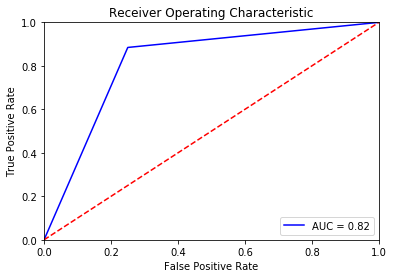

In [33]:
print("Confusion Matrix")
cnf_matrix = confusion_matrix(y_test_v1, y_pred)
print(cnf_matrix)
#Printing the classification report.
print ("Classification Report : ")
print (classification_report(y_test_v1,y_pred) )
fpr, tpr, threshold = roc_curve(y_test_v1,y_pred)
#Printing the area under the ROC curve.
roc_auc=roc_auc_score(y_test_v1,y_pred)
#Displaying the ROC curve
print (roc_auc)
plot.title('Receiver Operating Characteristic')
plot.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plot.legend(loc = 'lower right')
plot.plot([0, 1], [0, 1],'r--')
plot.xlim([0, 1])
plot.ylim([0, 1])
plot.ylabel('True Positive Rate')
plot.xlabel('False Positive Rate')
plot.show()

### Using linear model - SVM with 10-fold

In [34]:
scores = cross_val_score(classifier,x_train_v1,y_train_v1, cv=10)
scores 

array([0.75609756, 0.85365854, 0.82926829, 0.92682927, 0.775     ,
       0.75      , 0.79487179, 0.87179487, 0.87179487, 0.84615385])

### Computing metrics for svm with cross validation

In [35]:
mean_accuracy = np.mean(scores)
print("Mean:")
print(mean_accuracy)
std_accuracy = np.std(scores)
print("Std_Deviation")
print(std_accuracy)

Mean:
0.8275469043151971
Std_Deviation
0.05454458984556762


### Using non-linear ANN model

In [43]:
x_train_v1 = np.array(x_train_v1)
x_test_v1 = np.array(x_test_v1)
y_train_v1 = np.array(y_train_v1)
y_test_v1 = np.array(y_test_v1)
# create model
model = Sequential()
model.add(Dense(100, input_dim=9, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
sgd = SGD(lr=0.1, momentum=0.5, decay=0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 20
epochs = 7
history = model.fit(x_train_v1, y_train_v1,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.1)
print('Evaluating the test data on the model')
score = model.evaluate(x_test_v1, y_test_v1,batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

Train on 360 samples, validate on 40 samples
Epoch 1/7
360/360 [==============================] - 2s 5ms/step - loss: 0.6876 - acc: 0.6028 - val_loss: 0.5677 - val_acc: 0.8500
Epoch 2/7
360/360 [==============================] - 1s 1ms/step - loss: 0.5772 - acc: 0.7333 - val_loss: 0.4721 - val_acc: 0.8500
Epoch 3/7
360/360 [==============================] - 0s 762us/step - loss: 0.5480 - acc: 0.7694 - val_loss: 0.3892 - val_acc: 0.8500
Epoch 4/7
360/360 [==============================] - 0s 1ms/step - loss: 0.5036 - acc: 0.7889 - val_loss: 0.3318 - val_acc: 0.8750
Epoch 5/7
360/360 [==============================] - 0s 1ms/step - loss: 0.4554 - acc: 0.7972 - val_loss: 0.3193 - val_acc: 0.8750
Epoch 6/7
360/360 [==============================] - 1s 2ms/step - loss: 0.4326 - acc: 0.8167 - val_loss: 0.3185 - val_acc: 0.8750
Epoch 7/7
360/360 [==============================] - 0s 1ms/step - loss: 0.4352 - acc: 0.8222 - val_loss: 0.3053 - val_acc: 0.8500
Evaluating the test data on the mode

### Using Gensim 

In [91]:
#Creating an iterator.
class LabeledLineSentence(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
              yield gensim.models.doc2vec.LabeledSentence(doc,    
[self.labels_list[idx]])

In [119]:
x = len(y_train)
df1 = pd.DataFrame()
df1['tokens']=list1[0:x]
print(len(y_train),df1['tokens'].shape)

632 (632,)


In [120]:
#list5 is the labels for the reviews and it is the iterator over the tokens with labels=list5
list5=range(0,x)
it = LabeledLineSentence(df1['tokens'], list5)

In [121]:
model = gensim.models.Doc2Vec(size=100, min_count=0, alpha=0.025, min_alpha=0.05)
model.build_vocab(it)
total_examples=model.corpus_count
print("no of files read : ",total_examples)

/home/shreyavshetty/anaconda3/envs/py35/lib/python3.5/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/home/shreyavshetty/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  if __name__ == '__main__':


no of files read :  632


In [122]:
x_train,x_test,y_train,y_test=train_test_split(model.docvecs,y_train,test_size=0.1)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(568, 100) (568,)
(64, 100) (64,)


### Using linear model - SVM without k-fold
### This indicates how improper split does not result in good splits

In [123]:
classifier = svm.SVC(kernel='linear', C=0.1)
y_pred = classifier.fit(x_train, y_train).predict(x_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Computing metrics for SVM without k-fold


 Confusion Matrix : 
[[ 0 29]
 [ 0 35]]

 Classification Report : 
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        29
          1       0.55      1.00      0.71        35

avg / total       0.30      0.55      0.39        64

0.5


/home/shreyavshetty/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


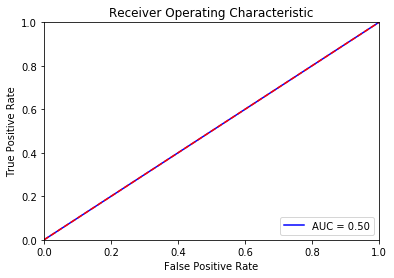

In [124]:
print ("\n Confusion Matrix : ")
# Making the Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#Displaying the classification report.
print ("\n Classification Report : ")
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred) )
fpr, tpr, threshold = roc_curve(y_test,y_pred)
#Displaying the area under the curve
roc_auc=roc_auc_score(y_test,y_pred)
#Displaying the ROC curve
print (roc_auc)
plot.title('Receiver Operating Characteristic')
plot.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plot.legend(loc = 'lower right')
plot.plot([0, 1], [0, 1],'r--')
plot.xlim([0, 1])
plot.ylim([0, 1])
plot.ylabel('True Positive Rate')
plot.xlabel('False Positive Rate')
plot.show()

### Using SVM with k-fold where k=10

In [125]:
scores = cross_val_score(classifier,x_train,y_train, cv=10)
scores 

array([0.51724138, 0.50877193, 0.50877193, 0.50877193, 0.50877193,
       0.50877193, 0.50877193, 0.51785714, 0.51785714, 0.51785714])

In [126]:
mean_accuracy = np.mean(scores)
print("Mean:")
print(mean_accuracy)
std_accuracy = np.std(scores)
print("Std_Deviation")
print(std_accuracy)

Mean:
0.5123444386829143
Std_Deviation
0.004378660373953554


### Using Non-Linear Model - ANN

In [115]:
# create model
print(X_train.shape)
print(y_train.shape)
model = Sequential()
model.add(Dense(100, input_dim=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
sgd = SGD(lr=0.1, momentum=0.5, decay=0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 20
epochs = 7
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.1)

(843, 100)
(632,)
Train on 568 samples, validate on 64 samples
Epoch 1/7
568/568 [==============================] - 2s 3ms/step - loss: 0.6931 - acc: 0.4595 - val_loss: 0.6926 - val_acc: 0.6250
Epoch 2/7
568/568 [==============================] - 1s 1ms/step - loss: 0.6932 - acc: 0.5053 - val_loss: 0.6928 - val_acc: 0.6250
Epoch 3/7
568/568 [==============================] - 0s 758us/step - loss: 0.6934 - acc: 0.4877 - val_loss: 0.6923 - val_acc: 0.6250
Epoch 4/7
568/568 [==============================] - 1s 905us/step - loss: 0.6931 - acc: 0.5053 - val_loss: 0.6919 - val_acc: 0.6250
Epoch 5/7
568/568 [==============================] - 1s 927us/step - loss: 0.6932 - acc: 0.5194 - val_loss: 0.6918 - val_acc: 0.6250
Epoch 6/7
568/568 [==============================] - 1s 1ms/step - loss: 0.6934 - acc: 0.5070 - val_loss: 0.6920 - val_acc: 0.6250
Epoch 7/7
568/568 [==============================] - 1s 1ms/step - loss: 0.6930 - acc: 0.5018 - val_loss: 0.6923 - val_acc: 0.6250
